<a href="https://colab.research.google.com/github/ShoSato-047/STAT380/blob/main/STAT380_2_4_(2025)_Probability_models_for_Y_Negative_binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Consider the following random variables:

1. The number of nondefective parts on an assembly line before the 3rd defective part is found.
2. The number of wrong quiz answers before 10 correct answers.
3. The number of busy signals you get when calling a help line before the 1st non-busy signal.

All of these random variables have the following in common:

* They involve a sequence of independent Bernoulli 0/1 failure/success trials;
* The probability of success $p$ is the same for each trial;
* The random variable $Y$ measures the number of *failures* before some pre-determined number of successes, $r$.  

Random variables in this context follow a *negative binomial* distribution, parameterized by $r$ the pre-specified number of successes we want to see, and $p$ the probability of success on each Bernoulli trial.  We then say $Y\sim NB(r,p)$.

# The negative binomial probability model

To build up the negative binomial model, suppose we are interested in the probability of observing $Y = 2$ failures before the $r = 3^{rd}$ success.  

One such sequence:

$$0\ 0\ 1\ 1\ 1$$

* What is the probability of this sequence, if the probability of $1$ on each trial is $p$?

**$$(1-p)(1-p)p p p = (1-p)^2p^3$$**



Another such sequence:

$$1\  0\  0\ 1\ 1$$

* What is the probability of this sequence, if the probability of $1$ on each trial is $p$?

**$$(1-p)^2p^3$$**


As we're seeing, the probability of any *one* sequence with $r$ $1's$ and $Y$ $0's$ is the same.  So, how many such sequences are there?

## Counting the sequences

Note that any sequence with $r$ $1's$ and $Y$ $0's$ *requires* $r$ to be in the final spot, since we continue taking trials until we have the prespecified $r$ number of successes.  This leaves the $Y$ $0's$ to be distributed anywhere in the $Y+r-1$ spots that come before:

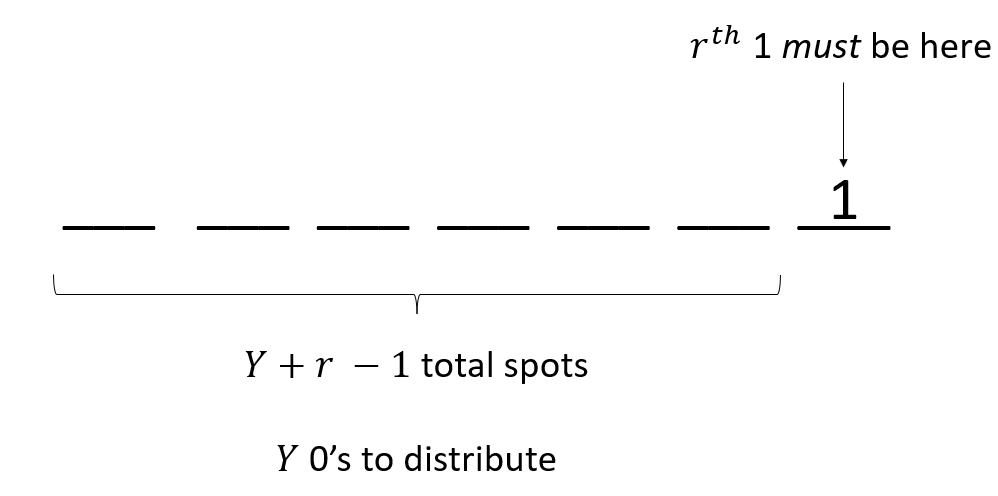

Thus the number of sequences with $Y$ $0's$ occurring before the $r^{th}$ $1$ is:

$${Y+r-1}\choose{Y}$$

Putting this together, the probability of observing $Y=k$ $0's$ before the $r^{th}$ success, given a fixed probability of success $p$ on each trial, is:

$$P(Y=k) = {{k+r-1}\choose{k}} p^r (1-p)^k; k = 0,1,2,...$$

* Why is the lower bound $0$?  For what values of $p$ would you expect $Y$ to reach its lower bound?
  - **Lower bound is 0 becasue you might get $r$ success right away. Very large values of $p$ close to 1 are likely to yield these sequences.**
* Why is there no upper bound?  For what values of $p$ would you expect very large $Y$?
  - **There is no upper bound on number of failures needed to get $r$ successes. $p=0$ means we have to wiat forever.**

# In R

If $Y\sim NB(r,p)$, then

* To find $P(Y=k)$:

`dnbinom(k, r, p)`

* To find $P(Y\leq k)$:

`pnbinom(k, r, p)`

* To generate $N$ random realizations of a negative binomial:

`rnbinom(N, r, p)`

# Mean and variance

If $Y\sim NB(r,p)$, then:

* $E(Y) = \frac{r(1-p)}{p}$
* $Var(Y) = \frac{r(1-p)}{p^2}$

Graphing the negative binomial probabilities for combinations of $r \in \{5,10\}$ and $p \in \{.2, .5\}$:

In [ ]:
library(dplyr)
(expand.grid(k = 0:30,r = c(5,10), p = c(.5, .8))
   %>% mutate(P.y = dnbinom(k, r, p))
) -> nb.df


In [ ]:
# Setting up the facet relabels
plabs <- c('p = 0.5','p = 0.8')
names(plabs) <- c('0.5','0.8')
rlabs <- c('r = 5', 'r = 10')
names(rlabs) <- c('5','10')

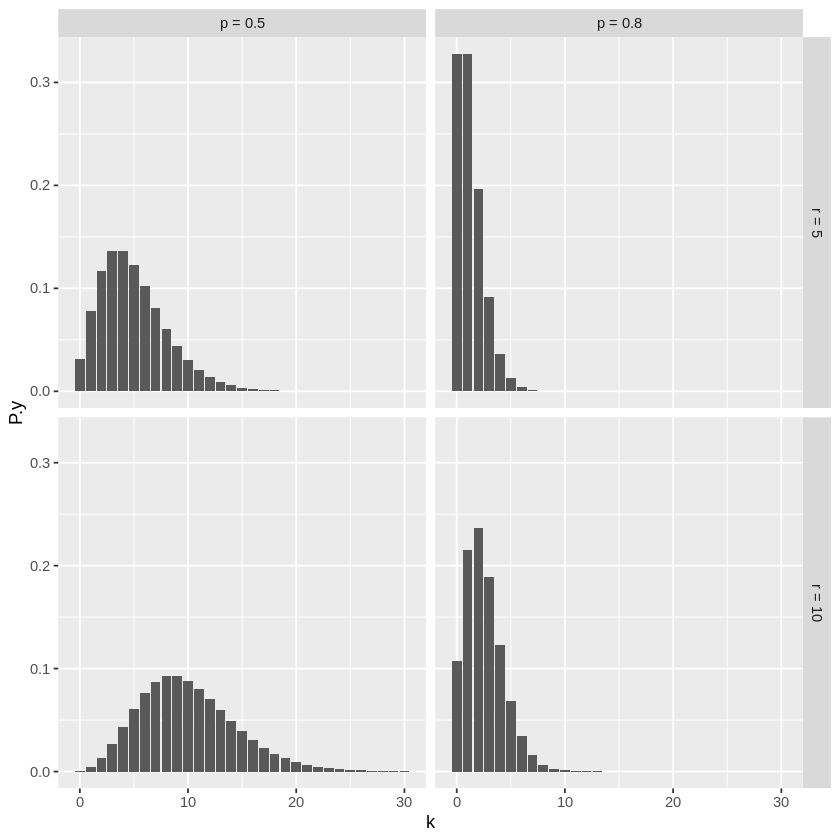

In [ ]:
library(ggplot2)
ggplot(data = nb.df) +
  geom_bar(aes(x = k, y = P.y), stat='identity') +
  facet_grid(r~p, labeller = labeller(p = plabs, r = rlabs))

* What happens to the means of these distributions for a fixed $p$, as $r$ increases from $r=5$ to $r=10$?  Why does this make sense?
* What happens to the means of these distributions for a fixed $r$, as $p$ increases from $p = 0.5$ to $p = 0.8$?  Why does this make sense?

# Example

Suppose 1 out of every 20 vehicles going through a new roundabout will be involved in a fender bender.  A camera is installed above a roundabout to observe the traffic.  

A telling letter to the editor complaining about the new (at the time) roundabouts in the [November 16, 2022 Winona Post](https://www.winonapost.com/opinion/winona-s-nightmare-roundabout/article_cb358222-65dd-11ed-be70-23f4afa6fd3e.html):



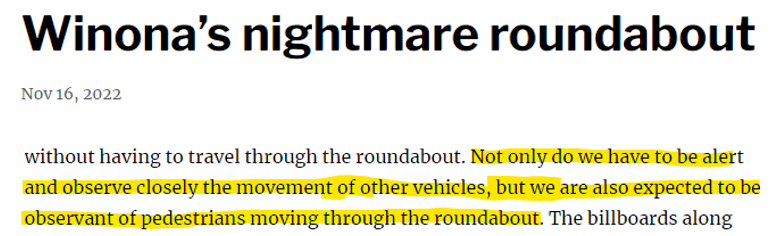

## Question 1

Consider $Y$, the number of non-fender-benders you observe before the 2nd fender-bender.

* In this problem, is a "success" a fender-bender or a non-fender-bender?  Explain.
  - **A "success" is a fender-bender, its' what's fixed (2).**
* The distribution of $Y$ is $Y\sim NB(2, 1/20 = 0.05)$
* Why is $Y\sim NB$ instead of $Y\sim BIN$?
  - **The random quantity is number of failures to see a fixed, (2) number of success.**


## Question 2

What is the probability you observe exactly 19 non-fender-benders before the 2nd fender-bender?  Answer this in two ways:

* Via simulation of 100,000 negative binomial samples using `rnbinom()`
* By using the analytic negative binomial model with `dnbinom()`.
* Via exact calculation.

In [3]:
many_crash_samples <- rnbinom(100000, 2, 1/20)
#head(many_crash_samples==19)
mean(many_crash_samples==19)

# 1.92 %

[1] 0.01922

In [4]:
# exact binomial:
dnbinom(19, 2, 0.05)

[1] 0.01886768

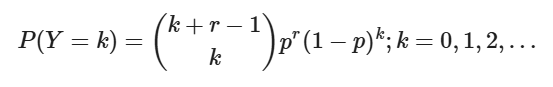

In [5]:
choose(19+2-1, 19)*0.05^2 * 0.95^19

[1] 0.01886768

## Question 3

What is the probability you observe 19 or fewer non-fender-benders before the 2nd fender-bender?  Answer this in *three* ways:

* Via simulation of 100,000 negative binomial samples using `rnbinom()`
* By using the analytic negative binomial model with `dnbinom()`.
* By using the analytic negative binomial model with `pnbinom()`.

In [6]:
mean(many_crash_samples <= 19)

[1] 0.28356

In [7]:
sum(dbinom(0:19, 2, 0.05))

[1] 1

In [9]:
pnbinom(19, 2, 0.05)

[1] 0.2830282